# Salary Comparison: Data Scientist vs Software Engineer

This analysis tests whether Data Scientists and Software Engineers at this example company are paid equally on average. Understanding pay differences helps evaluate pay equity and market alignment.

## 📌 Hypotheses

H₀ (null): The mean pay for Data Analysts and Software Engineers is equal.

H₁ (alternative): The mean pay for Data Analysts is different from (or lower than / higher than) the mean pay for Software Engineers.

###  Load Data 🗂️

I will first import needed libraries and import the csv.



In [78]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#load data
df = pd.read_csv("c:\projects\Income Difference Project\data\Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### 🧹 Clean & Prepare Data

Check for missing values in Job Title and Salary.

Filter for only Data Scientist and Software Engineer

Groupby these 2 job roles and 'Salary'

Save this to a new dataframe

In [79]:
#see if there is any missing entries and remove them
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [80]:
df = df[df['Job Title'].isin(['Data Scientist', 'Software Engineer'])]
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
32,29.0,Male,Master's,Data Scientist,3.0,75000.0
375,31.0,Male,Master's,Data Scientist,6.0,160000.0
376,28.0,Female,Bachelor's,Software Engineer,3.0,125000.0
379,30.0,Male,PhD,Data Scientist,5.0,180000.0


### Exploratory Data Analysis

Show mean, median, standard deviation and variance for each role

Use boxplot to visualize difference in salary.

In [81]:
df.groupby('Job Title')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Job Title,,,,,,,,
Data Scientist,453.0,166105.960265,28228.873136,75000.0,140000.0,168000.0,185000.0,240000.0
Software Engineer,518.0,113243.243243,48031.287179,50000.0,70000.0,90000.0,160000.0,197000.0


Text(0.5, 1.0, 'Salary Distribution By Role')

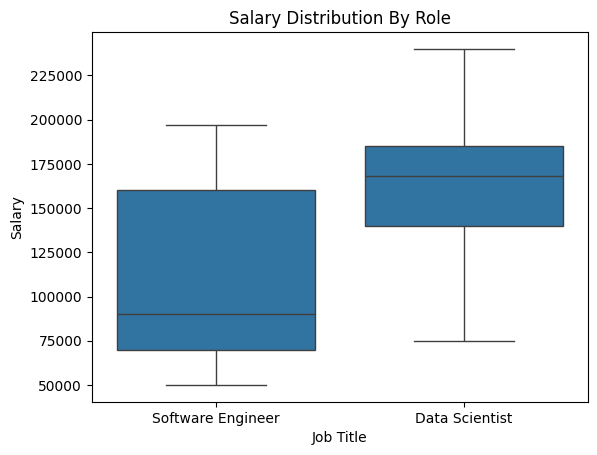

In [82]:
sns.boxplot(data=df, x = 'Job Title', y = 'Salary')
plt.title("Salary Distribution By Role")


### 🔍 Insight

As shown by the summary statistics and boxplot, **Data Scientists** have a higher mean salary but a tighter spread. The small interquartile range (IQR) suggests that most Data Scientists are paid around the same amount. However, the long whiskers on either side indicate a few outliers who earn significantly more or less. This is reasonable, as it likely reflects senior Data Scientists at the high end and junior or entry-level hires at the low end.

**Software Engineers**, by contrast, have a lower mean salary but a wider IQR. This suggests that individual Software Engineer salaries vary more on average, possibly due to differences in seniority, specialization, or educational background. Interestingly, the overall range for Software Engineers is smaller, which means there are fewer extreme high or low salaries compared to Data Scientists.


### Hypotheses

**Null Hypothesis (H₀):** The mean salary for Data Analysts and Software Engineers is equal.

**Alternative Hypothesis (H₁):** The mean salary for Data Analysts is different from the mean salary for Software Engineers.

**Significance level:** α = 0.05

### Check Assupmtions

Visually check with histplot to see if both groups are roughly normal

Use Levenes test to check for equal variance assumption

Text(0.5, 1.0, 'Software Engineer Salary Distribution')

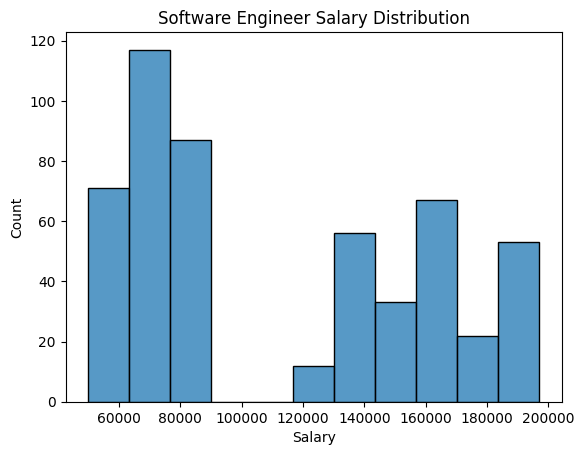

In [83]:
sns.histplot(data=df[df['Job Title']== 'Software Engineer'], x='Salary')
plt.title("Software Engineer Salary Distribution")


Text(0.5, 1.0, 'Data Scientist Salary Distribution')

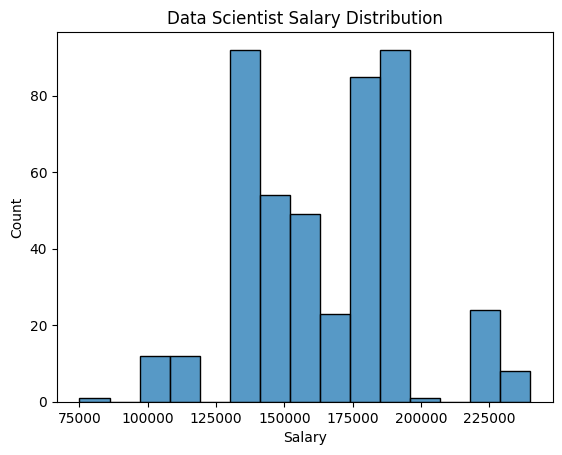

In [84]:
sns.histplot(data=df[df['Job Title']== 'Data Scientist'], x='Salary')
plt.title("Data Scientist Salary Distribution")


In [85]:
#use levene test to compare variances
from scipy.stats import levene
group1 = df[df['Job Title'] == 'Data Scientist']['Salary']
group2 = df[df['Job Title'] == 'Software Engineer']['Salary']
stat, p = levene(group1, group2)

print(f'Statistic: {stat:.3}')
print(f'P-value: {p:.3}')

Statistic: 1.62e+02
P-value: 2.14e-34


### Assumptions

#### Normality

The salary for Software Engineers is evidently right skewed, however the large sample size of 453. According to central limit theorem, the sampling distribution of the mean will always follow a normal distribution when the sample size is sufficiently large. Therefore, hypothesis testing can still be done.

#### Variance

Levene's test gave a p_value of 2.14e-34 - very small, coming close to 0. This means that we reject the hypothesis that group variances are equal. As a result, we will use **Welch’s t-test**, which does not assume equal variances.

In [86]:
#do ttest, setting equal_var=False, this will make the function use Welch's correction
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f'Statistic: {stat:.3}')
print(f'P-value: {p_value:.3}')

Statistic: 21.2
P-value: 1.62e-80


## ✅ Conclusion

The Welch’s t-test produced a test statistic of **21.2** and a p-value of **1.62 × 10⁻⁸⁰**, which is far smaller than the chosen significance level (α = 0.05).

Given the large sample size and the clear mean salary gap (~$52,000), it is reasonable that the Welch’s t-test produced a very large test statistic and an extremely small p-value. This strongly supports the conclusion that average pay differs significantly between Data Scientists and Software Engineers in this dataset.

This means we **reject the null hypothesis** that the mean salary for Software Engineers and Data Scientists is equal.

In practical terms, there is extremely strong statistical evidence that the average salary for these two roles is significantly different. Combined with the summary statistics and boxplot, this indicates that **Software Engineers and Data Scientists do not earn the same on average** in this dataset.

It’s important to note that this result only reflects the difference in mean salaries — it does not account for other factors like experience level, seniority, location, or specific skills, which could also influence pay. Further analysis could adjust for these variables to better understand the drivers behind this pay gap.
